In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import shuffle

# Load dataset

In [ ]:
# Load dataset
(X_train_all, Y_train_all), (X_test_all, Y_test_all) = tf.keras.datasets.cifar10.load_data()

x_test = X_train_all[:5000]
y_test = Y_train_all[:5000]
x_train = X_train_all[5000:]
y_train = Y_train_all[5000:]

# Preprocessing

Step 1: Convert pixel values to float32 and scale to [0, 1]

Step 2: Rescale to [-1, 1]

Step 3: Convert labels to one-hot encoding

In [ ]:
# Convert pixel values to float32 and scale to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Rescale to [-1, 1]
x_train = 2 * x_train - 1
x_test = 2 * x_test - 1

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# CNN Model for Training

In [ ]:
def model():
  model = models.Sequential([
      # 1st Conv layer
      layers.Conv2D(3, (5,5), strides=1, padding='same',
                    activation='relu', kernel_initializer='he_normal',
                    input_shape=(32,32,3)),
      layers.MaxPooling2D(pool_size=(2,2), strides=2),

      # 2nd Conv layer
      layers.Conv2D(10, (5,5), strides=1, padding='same',
                    activation='relu', kernel_initializer='he_normal'),
      layers.MaxPooling2D(pool_size=(2,2), strides=2),

      # Flatten + Fully connected layers
      layers.Flatten(),
      layers.Dense(20, activation='relu', kernel_initializer='he_normal'),
      layers.Dense(10, activation='softmax')
  ])

  model.summary()
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  return model


# Training model with out Data Augmentation

In [ ]:
model_without_aug = model()
history = model_without_aug.fit(
    x_train, y_train,
    epochs=200,
    batch_size=64,
    validation_split=0.1,
    verbose=1)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 3)      │           228 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 10)     │           760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 640)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │        12,820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,018 (54.76 KB)

 Trainable params: 14,018 (54.76 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
633/633 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.2449 - loss: 2.0303 - val_accuracy: 0.4022 - val_loss: 1.6435
Epoch 2/200
633/633 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4187 - loss: 1.5912 - val_accuracy: 0.4644 - val_loss: 1.4744
Epoch 3/200
633/633 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4737 - loss: 1.4610 - val_accuracy: 0.4929 - val_loss: 1.4375
Epoch 4/200
633/633 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5022 - loss: 1.3946 - val_accuracy: 0.5142 - val_loss: 1.3707
Epoch 5/200
633/633 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5206 - loss: 1.3414 - val_accuracy: 0.5164 - val_loss: 1.3349
Epoch 6/200
633/633 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5333 - loss: 1.3151 - val_accuracy: 0.5413 - val_loss: 1.2953
Epoch 7/200
633/633 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5429 - loss: 1.2862 - val_accuracy: 0.5398 - val_loss: 1.2905
Epoch 8/200
633/633 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5533 - loss: 1.2553 - val_accu

# Training and Accuracy curve


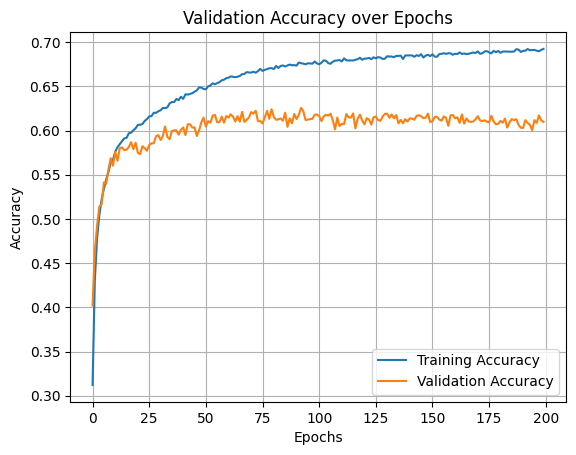

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Validation Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
test_loss, test_acc = model_without_aug.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")

157/157 - 2s - 10ms/step - accuracy: 0.5926 - loss: 1.2638
Test Accuracy: 0.5926


# Data Preprocessing for Augmentation

In [ ]:
(x_train_all, y_train_all), (x_test_all, y_test_all) = tf.keras.datasets.cifar10.load_data()

#Train and validation split
x_val = x_train_all[:5000]
y_val = y_train_all[:5000]
x_train = x_train_all[5000:]
y_train = y_train_all[5000:]

In [ ]:
x_train_f = x_train.astype("float32") / 255.0
x_val_f   = x_val.astype("float32") / 255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_val, 10)

# Data Augmentation
# Brighten 10%
x_bright = np.minimum(1.1 * x_train_f, 1.0)

# Darken −10%
x_dark = 0.9 * x_train_f

# Flip horizontally
x_flip = x_train_f[:, :, ::-1, :]   # reverse along width axis


# Merge into one big dataset
X_augmented = np.concatenate([x_train_f, x_bright, x_dark, x_flip], axis=0)
Y_augmented = np.concatenate([y_train, y_train, y_train, y_train], axis=0)

# Shuffle to mix them
X_augmented, Y_augmented = shuffle(X_augmented, Y_augmented, random_state=42)

X_augmented = 2 * X_augmented - 1
x_test_preprocess = 2 * x_val_f - 1


print("After augmentation:", X_augmented.shape, Y_augmented.shape)

After augmentation: (180000, 32, 32, 3) (180000, 10)


In [ ]:
model_aug = model()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 3)      │           228 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 10)     │           760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 640)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 20)             │        12,820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,018 (54.76 KB)

 Trainable params: 14,018 (54.76 KB)

 Non-trainable params: 0 (0.00 B)

# Training model for augmented Data

In [ ]:
history_aug = model_aug.fit(
    X_augmented, Y_augmented,
    epochs=200,
    batch_size=64,
    validation_data=(x_test_preprocess, y_test),
    verbose=1
)

Epoch 1/200
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.3918 - loss: 1.6827 - val_accuracy: 0.5364 - val_loss: 1.3184
Epoch 2/200
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.5597 - loss: 1.2511 - val_accuracy: 0.5732 - val_loss: 1.2130
Epoch 3/200
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.5883 - loss: 1.1709 - val_accuracy: 0.6048 - val_loss: 1.1656
Epoch 4/200
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.6066 - loss: 1.1247 - val_accuracy: 0.6116 - val_loss: 1.1303
Epoch 5/200
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.6182 - loss: 1.0923 - val_accuracy: 0.6060 - val_loss: 1.1502
Epoch 6/200
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.6294 - loss: 1.0662 - val_accuracy: 0.6090 - val_loss: 1.1199
Epoch 7/200
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6332 - loss: 1.0530 - val_accuracy: 0.6120 - val_loss: 1.1048
Epoch 8/200
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6350 -

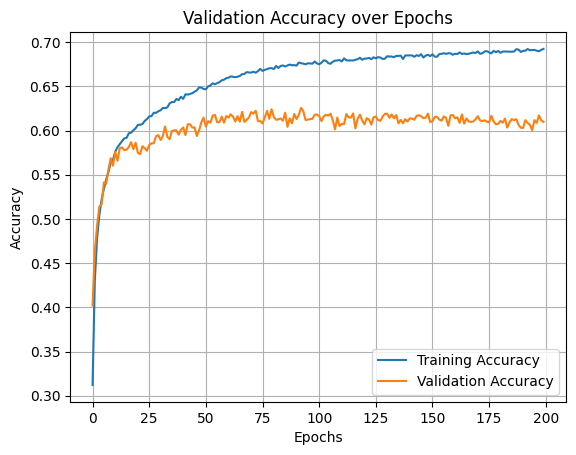

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Validation Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
test_loss, test_acc = model_aug.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")

157/157 - 1s - 5ms/step - accuracy: 0.6508 - loss: 1.0310
Test Accuracy: 0.6508


# Performance on Validation data for  baseline model and model trained with augmented data

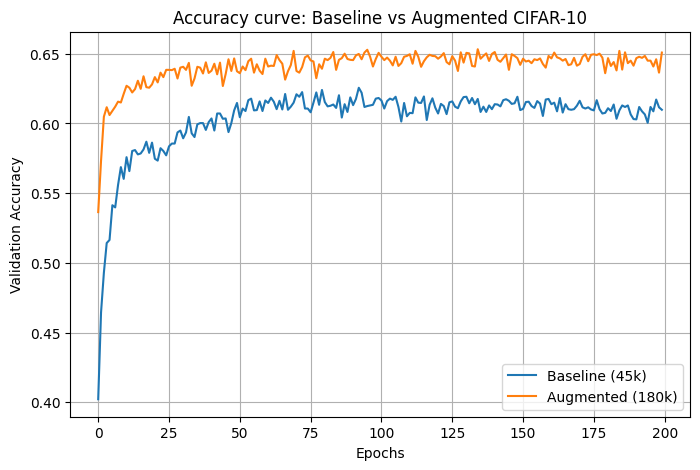

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history.history['val_accuracy'], label='Baseline (45k)')
plt.plot(history_aug.history['val_accuracy'], label='Augmented (180k)')
plt.title("Accuracy curve: Baseline vs Augmented CIFAR-10")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()

Observation:

1. Without augmentation, the model overfits the training set quickly and validation accuracy is stagnate.

2. Augmentation makes training harder initially

3. Augmentation does makes the learning better compared to the baseline model

In [ ]:
model_aug.save('augmented_model_hw3_1610.h5')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

from google.colab import files

!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/DLS_HW2_3.ipynb"
files.download("/content/drive/MyDrive/Colab Notebooks/DLS_HW2_3.html")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/DLS_HW2_3.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 613292 bytes to /content/drive/MyDrive/Colab Notebooks/DLS_HW2_3.html


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>